#Leer el archivo npy

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from itertools import islice
from sklearn.metrics import mean_squared_error, r2_score



In [2]:
archivo = np.load('/content/proyecto_training_data.npy')

In [4]:
#Verificamos el total de filas del archivo
len(archivo)


1460

In [5]:
data_total  = len(archivo)

## 2. Usando sclicing con NumPy separar los datos en 2 datasets: entrenamiento(80 %) y validacio y pruebas(20 %)

In [7]:
#Definimos el tamaño de los datasets
entrenamiento = 0.80
validacion = 0.20
# Calcular los tamaños de cada conjunto
ind_entrenamiento = int(data_total * entrenamiento)
data_entrenamiento = archivo[:ind_entrenamiento]
ind_validacion_prueba = int(data_total * validacion)
data_validacion = archivo[:ind_validacion_prueba]

## 3. Analisis exploratorio de datos: Para cada variable en el dataset calcula usando numpy o pandas

In [8]:
type(data_entrenamiento)

numpy.ndarray

In [9]:
data_entrenamiento = pd.DataFrame(data_entrenamiento)

In [10]:
data_entrenamiento.describe()

,0,1,2,3,4,5
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,962.000000
mean,180590.277397,6.101027,1156.323630,6.485445,1971.451199,69.946985
std,78815.697902,1.378025,373.780374,1.609141,29.951707,23.478161
min,34900.000000,1.000000,334.000000,2.000000,1875.000000,21.000000
25%,129900.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,162950.000000,6.000000,1086.000000,6.000000,1973.000000,70.000000
75%,214000.000000,7.000000,1390.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,3228.000000,14.000000,2010.000000,313.000000


 ## 4. Para cada variable en el dataset usar seaborn para graficar un histograma de la variable.


<ipython-input-9-33c05f476208>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_entrenamiento[columna], kde=False)


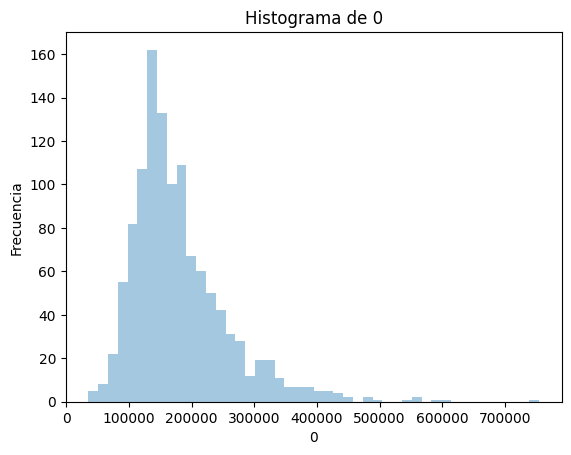

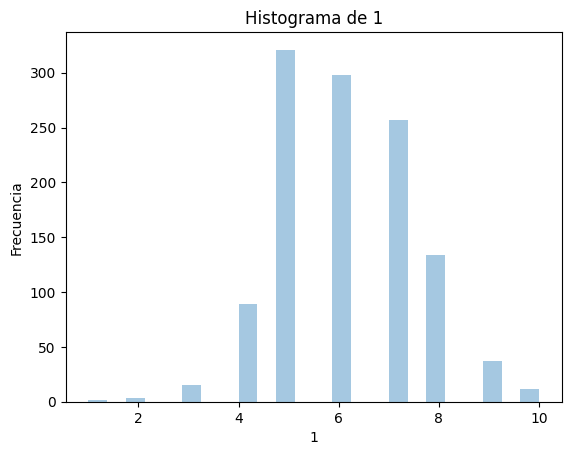

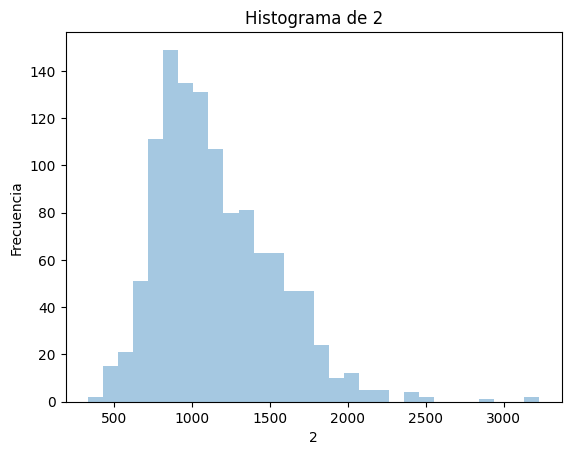

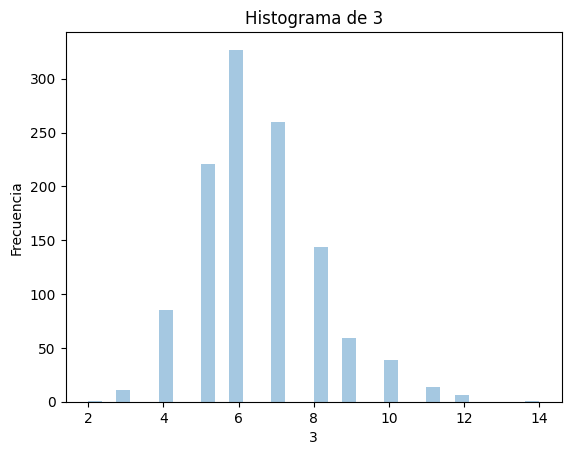

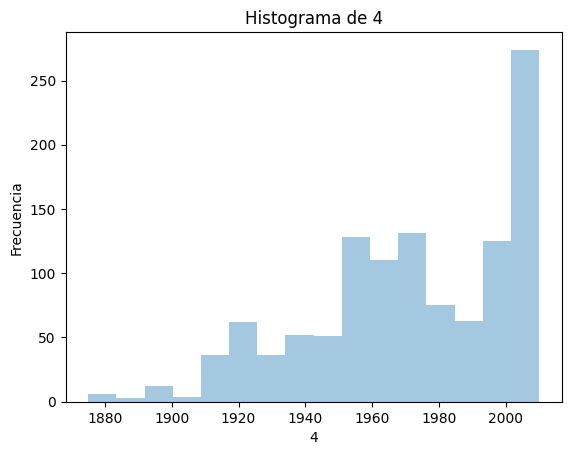

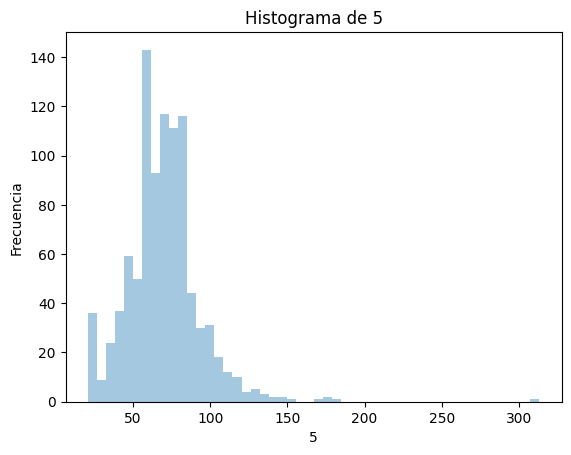

In [ ]:

for columna in data_entrenamiento.columns:
    sns.distplot(data_entrenamiento[columna], kde=False)
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.show()


## 5. Para cada variable independiente X:


### 5.1 Calcular el coeficiente de correlacion entre x y y

In [ ]:
data_entrenamiento.columns

RangeIndex(start=0, stop=6, step=1)

In [ ]:
coef_correlacion_1 = data_entrenamiento[0].corr(data_entrenamiento[1])
coef_correlacion_2 = data_entrenamiento[0].corr(data_entrenamiento[2])
coef_correlacion_3 = data_entrenamiento[0].corr(data_entrenamiento[3])
coef_correlacion_4 = data_entrenamiento[0].corr(data_entrenamiento[4])
coef_correlacion_5 = data_entrenamiento[0].corr(data_entrenamiento[5])
print("Coeficiente de correlación entre 0 y 1:", coef_correlacion_1)
print("Coeficiente de correlación entre 0 y 2:", coef_correlacion_2)
print("Coeficiente de correlación entre 0 y 3:", coef_correlacion_3)
print("Coeficiente de correlación entre 0 y 4:", coef_correlacion_4)
print("Coeficiente de correlación entre 0 y 5:", coef_correlacion_5)

Coeficiente de correlación entre 0 y 1: 0.7939900504626405
Coeficiente de correlación entre 0 y 2: 0.6162887000998714
Coeficiente de correlación entre 0 y 3: 0.5647069399593064
Coeficiente de correlación entre 0 y 4: 0.5341706927117517
Coeficiente de correlación entre 0 y 5: 0.363291616653892


### 5.2 y 5.3 Graficar X vs y  Colocar el coeficiente de correlaci´on y colocarlo como parte del t´ıtulo de la gr´afica.

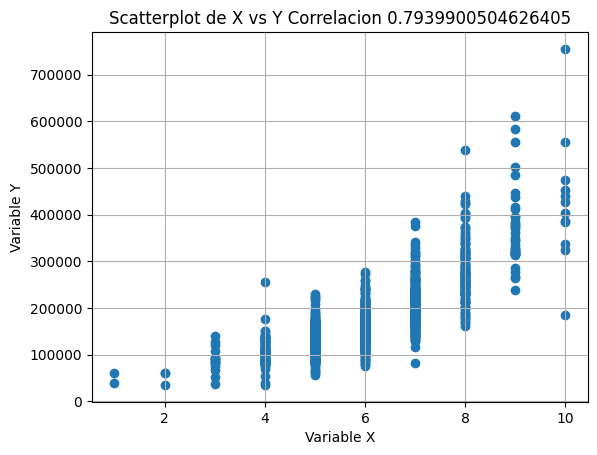

In [ ]:
# Graficar x vs y como un scatterplot
plt.scatter(data_entrenamiento[1], data_entrenamiento[0])

# Agregar etiquetas y título al gráfico
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.title(f'Scatterplot de X vs Y Correlacion {coef_correlacion_1}')

# Mostrar el gráfico
plt.grid(True)  # Agregar una cuadrícula al gráfico si lo deseas
plt.show()


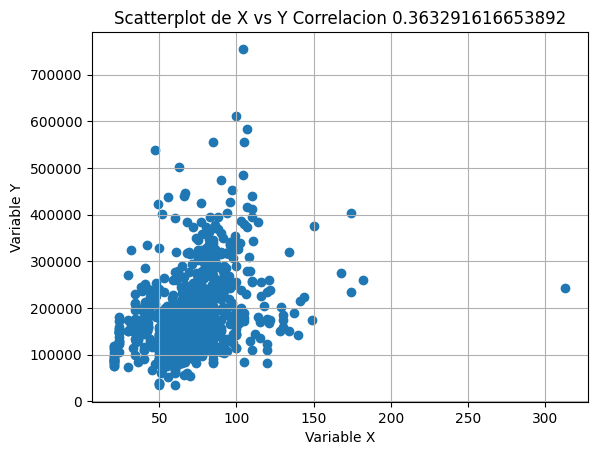

In [ ]:
# Graficar x vs y como un scatterplot
plt.scatter(data_entrenamiento[5], data_entrenamiento[0])

# Agregar etiquetas y título al gráfico
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.title(f'Scatterplot de X vs Y Correlacion {coef_correlacion_5}')

# Mostrar el gráfico
plt.grid(True)  # Agregar una cuadrícula al gráfico si lo deseas
plt.show()

### 5.4 Basado en la grafica y el coeficiente de correlacion de cada par x,y elegir las 2 variables
con mas potencial predictivo es decir las 2 variables que presentan mayor correlacion
entre dicha variable y la variable dependiente. **Coeficiente de correlación entre 0 y 1:**

## 6. Crear una funcion para entrenar un modelo de regresion lineal de una variable y = β0 +β1 ∗x La funcion recibe como argumentos:

In [ ]:
# Para poder hacer la regresion lineal hay que dividir la matriz en 2 ya que si no no nos compila
#Establecemos que correlacion a la que deseamos aplicarle la regresion lineal
#Tomamos la correlacion entre 0 y 1
x = data_entrenamiento[1]
y = data_entrenamiento[0]
#Establecemos el numero de ciclo completo de entrenamiento (Verificar en grafica si es la cantidad correcta)
epochs = 10
# Dividimos X
x_1 = islice(x, 0, len(x) // 2)
x_2 = islice(x, len(x) // 2, len(x))

# Unimos X_1 y X_2 y lo convertimos en una lista
x_final = np.array([list(x_1), list(x_2)])

# Dividimos Y
y_1 = islice(y, 0, len(y) // 2)
y_2 = islice(y, len(y) // 2, len(y))

# Unimos y_1 y y_2 y lo convertimos en una lista
y_final = np.array([list(y_1), list(y_2)])



In [ ]:
# Posterior a la division en matrices de x y y ya podemos hacer la regresion lineal
modelo = LinearRegression()
#Entreno el modelo con los datos (X y Y) y le asigno la cantidad de ciclos que vamos a hacer
modelo.fit(x_final, y_final,epochs)


LinearRegression()

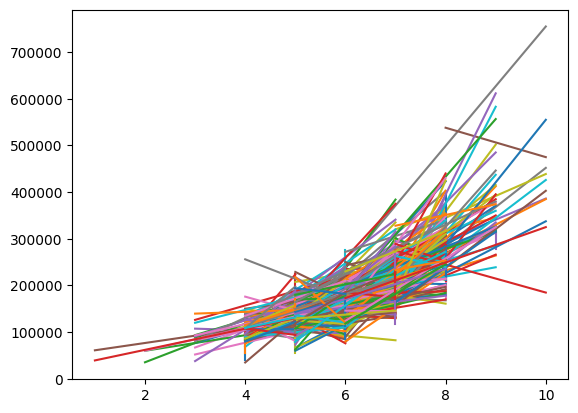

In [ ]:
plt.plot(x_final, y_final)
plt.show()



In [ ]:
# Predecimos
y_pred = modelo.predict(x_final)
# Calculamos el error cuadrarico, estadistico beta 0 y 1
error_cuadratico = mean_squared_error(y_final, y_pred)
estadistico = r2_score(y_final, y_pred)
beta_0 = modelo.intercept_
beta_1 = modelo.coef_[0]


In [ ]:
#Imprimimos lo calculado
print("Error cuadrático medio:",error_cuadratico )
print("Estadístico R_2:",estadistico)




Error cuadrático medio: 2.150737580085479e-20
Estadístico R_2: 1.0


In [ ]:
print("Coeficiente de Beta 0 ",beta_0)

Coeficiente de Beta 0  [166207.49677913 286351.02660793 171549.99690012 138363.64683924
 191449.34833306 107574.14759328 240156.16690667 337740.93866043
 134358.30830544 130053.4628741  118984.16876922 330871.81230192
 127496.97848268 231835.98590668 190387.95153209 142818.65742721
 219172.4045219  118219.55144681 193370.07802006 145545.41264304
 267298.50643583 176252.38301897 187936.67507687 181651.93088196
 267625.43610793 180681.75740666 235292.06900297 219229.79688625
 237114.97597924 112187.9277533   59617.82595446 142745.86331514
 181699.98847684 132451.69861368 298028.15921193 306764.65609047
 102936.67507687 201819.50388924 123128.18769808 129194.90105907
 162855.92015926 164491.94976895 141696.72606131 142812.93809275
 137727.29367848 236328.22612605 175234.94600069 227531.93901748
  95814.96098997 133817.13275966 158759.18660331 162300.55345192
  82459.74884474 225192.89540078 105213.77396026 227323.04033239
 228599.45274784 213005.73871849 387924.74550288 139775.41801878
 2

In [ ]:
print("Coeficiente de Beta 1 ",beta_1)
#Veficar porque salen negativos Beta

Coeficiente de Beta 1  [-1739.87488411   -81.78329453    40.89164727    81.78329453
   112.06123732     0.            40.89164727  -112.06123732
    81.78329453   -40.89164727     0.            40.89164727
   -40.89164727     0.            40.89164727    40.89164727
   -81.78329453   -81.78329453  -112.06123732   -81.78329453
    40.89164727     0.           112.06123732     0.
  -112.06123732   163.56658906  -163.56658906    81.78329453
  -112.06123732   -40.89164727     0.           -40.89164727
    81.78329453   -40.89164727     0.             0.
    81.78329453   -40.89164727     0.           -81.78329453
     0.           -40.89164727     0.           -40.89164727
     0.           112.06123732    81.78329453     0.
  -112.06123732     0.             0.             0.
   112.06123732   163.56658906     0.           -81.78329453
     0.             0.            81.78329453     0.
  -112.06123732   -40.89164727   112.06123732    40.89164727
    40.89164727   163.56658906     0.    

7. Calcular y (prediccion o estimacion) para todas las observaciones de manera simultanea(vectorizada) utilizando el modelo correspondiente a la iteracion(es decir ,
los valores de β0 y β1,): esto produce un vector y con el mismo numero de elementos
que y.


In [ ]:
#Calculamos  y sombrerito como son varios valores se hace una funcion
def calcular_y_sombrerito(beta_0, beta_1, x_final):
    # Calculamos Y sombrerito
    y_sombrerito = beta_1 * x_final + beta_0
    return y_sombrerito
y_sombrerito = calcular_y_sombrerito(beta_0, beta_1, x_final)
#Verificamos que haya hecho bien el calculo
print("y sombrerito:", y_sombrerito)
#Buscar articulo para Verificar si los valores están bien

y sombrerito: [[154028.37259038 285860.32684074 171836.23843098 ... 242520.47878016
  187474.15731813 240086.40647295]
 [159247.9972427  285696.76025168 171795.34678371 ... 242479.5871329
  187310.59072907 239432.1401167 ]]


### Calcular el error o costo usando: y ,y

In [ ]:
def calcular_error(y_pred, y_sombrerito):
    # Calculamos el errror
    error_costo = mean_squared_error(y_pred, y_sombrerito)
    return error_costo
error_costo = calcular_error(y_pred, y_sombrerito)
#Verificamos que haya hecho bien el calculo
print("error_o_costo:", error_costo)

error_o_costo: 2857074769.391185


In [ ]:
def calculo_gradiante(y_pred, y_sombrerito, x_final):
    # Calculamos la gradiante
    error_costo = mean_squared_eror(y_pred, y_sombrerito)
    return error_costo
error_costo = calcular_error(y_pred, y_sombrerito)
#Verificamos que haya hecho bien el calculo
print("error_o_costo:", error_costo)

error_o_costo: 2857074769.391185
